In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pySMOKEPostProcessor import PostProcessor
from pySMOKEPostProcessor import plot_bars

# Sensitivity Analysis

As for the Rate Of Production Analysis and the Flux Analysis first of all call the constructor of the Post Processor then acces the function to compute the Sensitivity Analysis.

* Function to perform post-processing of Sensitivity Analysis (**`SensitivityAnalysis`**) accepts several arguments hereinafter reported and varying depending on the type of the analysis that is needed:

**Global Sensitivity Analysis**: the most important reactions are automatically selected on the whole computational domain, by looking at the absolute value of the peak.
> * `kinetic_folder` ( *string* ): path to the folder containing the files relative to the kinetic mechanism named directly, after the pre-processing by OpenSMOKE++: **kinetics.xml** and **reaction_names.xml**.
> * `output_folder` ( *string* ): path to the folder containing the files relative to the output of the simulations that are directly generated by OpenSMOKE++. Depending on the need different files are required. For the post-processing of the Sensitivity Analysis are required the files named: **Output.xml**, **Sensitivity.xml**, **Sensitivity.temperature.xml** and depending on the simulation at least one file named **Sensitivity.my_favourite_specie.xml**.
> * `target` ( *string* ): the name of the target on which the Sensitivity analysis post-processing is performed.
> * `sensitivity_type` ( *string* ): select the type of the Sensitivity analysis. Three types settings are available "global", "local" and "region".
> * `number_of_reactions` ( *int* default: 10 ): number of reactions to be analyzed.
> * `normalization_type` ( *string* ): sets the type of normalization that sensitivity coefficients undergoes inside the post-processing. Available types are: "local" and "max_value".
    1. **local**: the sensitivity coefficients are normalized using the local value of the Y variable (specie). This approach can lead to unspected results when the Y variable approaches 0 (i.e., when the mass fraction of a specie is close to zero).
    2. **max-value**: the sensitivity coefficients are normalized using the maximum value of the Y variable (specie) evaluated on the whole computational domain. 
> * `ordering_type` ( *string* ): specify the strategy to select the most important reactions, available types are "peak_value", "area", "absolute_area".
    1. **peak-value**: reactions are ordered by looking only at the absolute peak value of the sensitivity coefficients
    2. **area**: reactions are ordered by taking into account the mean integral value of the sensitivty coefficients (i.e., the are between the sensivity coefficient profile and the x-axis). If the sign if coefficient changes in inside the considered domain this area can be very small.
    3. **absolute-area**: reactions are ordered by taking into account the absolute mean integral value of the sensitivty coefficients (i.e., the are between the absolute sensivity coefficient profile and the x-axis).
    
**Local Sensitivity Analysis**: the most important reactions are automatically selected by looking at the values of the sensitivty coefficients only in the location specified by the user.
    
> * `local_value` ( *float* ): value to specify, on the computational domain, where to selected the most important reactions.
    
**Region Sensitivity Analysis**: the most important reactions are automatically selected by looking at the values of the sensitivty coefficients only in the region specified by the user.
    
> * `lower_value` ( *float* ): value of the lower bound of the region, of the computational domain, where to selct the most important reactions.
> * `upper_value` ( *float* ): value of the upper bound of the region, of the computational domain, where to selct the most important reactions.
 
Function Sensitivty Analysis (**`SensitivityAnalysis`**) will return three lists:
- The list containing the coefficient of each selected reaction.
- The list of the indices of each selected reaction inside the mechanism (0-based).
- he list containing the names of the selected reactions (plotting purposes).

In [11]:

kineticFolder = "/Users/tdinelli/Desktop/OME2-Converge/mechanisms/redux/kinetics/"
resultsFolder = "/Users/tdinelli/Desktop/OME2-Converge/data/OME2/IDT/ST/CAI/10_1/SENSI/"

pp = PostProcessor(kineticFolder, resultsFolder)

species = "OH"

sens_results = pp.SensitivityAnalysis(target=species,
                                      sensitivity_type="global",
                                      local_value=1e3*1e-6,
                                      number_of_reactions=30,
                                      ordering_type="peak-values",
                                      normalization_type="local")

df = pd.DataFrame(sens_results)
df.head()

,coefficients,reaction_names,reaction_indices
0,2670.457540,R368: CH3O2+OME2=>CH3O2H+OME2-R,367
1,-1642.046277,R43: HO2+CH3=O2+CH4,42
2,-1473.607912,R161(inf): 2CH3(+M)=C2H6(+M),443
3,1463.679224,R366: HO2+OME2=>H2O2+OME2-R,365
4,1162.868992,R14: H2O2(+M)=2OH(+M),13


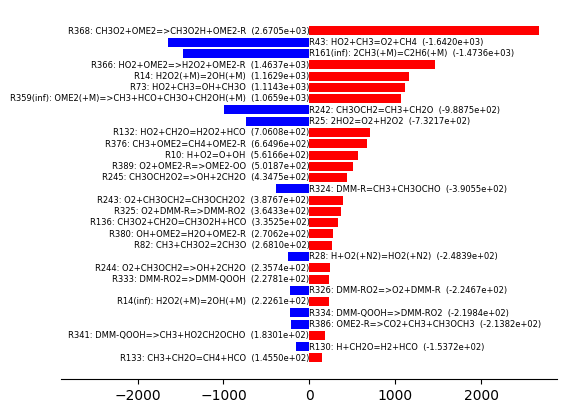

In [12]:
fig, ax = plot_bars(df)
plt.show()

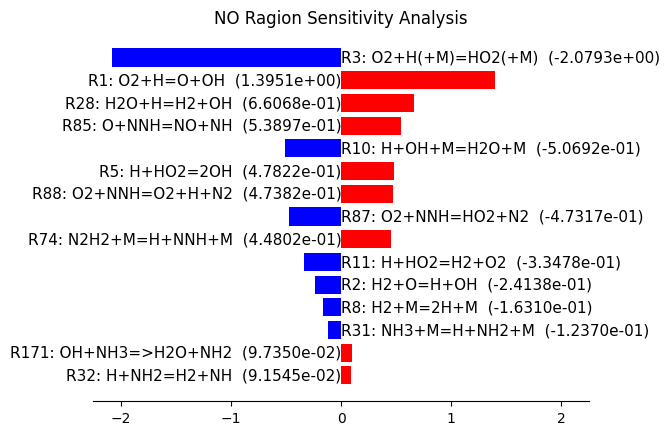

In [4]:
# REGION
upper = 0.0005
lower = 0.0009
nrxns = 15

sens_results = pp.SensitivityAnalysis(target=species,
                                      sensitivity_type="region",
                                      ordering_type="peak-values",
                                      normalization_type="local",
                                      lower_value=upper,
                                      upper_value=lower,
                                      number_of_reactions=nrxns)
df = pd.DataFrame(sens_results)

fig, ax = plot_bars(df)
ax.set_title("NO Ragion Sensitivity Analysis")
plt.show()